In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr
import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [20]:
all_df=pd.read_csv('TrainDataset2023.csv', index_col=False)
all_df.head() 

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1.0,144.0,41.0,0,0.0,0.0,1.0,3.0,3.0,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0.0,142.0,39.0,1,1.0,0.0,0.0,3.0,3.0,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1.0,135.0,31.0,0,0.0,0.0,1.0,2.0,1.0,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0.0,12.0,35.0,0,0.0,0.0,1.0,3.0,3.0,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0.0,109.0,61.0,1,0.0,0.0,0.0,2.0,1.0,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [21]:
all_df.drop('ID', axis=1, inplace=True)
all_df.drop('pCR (outcome)', axis=1, inplace=True)

In [22]:
# Data imputation 
# Use regression model to do data imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
impute_it.fit_transform(all_df)

array([[1.44000000e+02, 4.10000000e+01, 0.00000000e+00, ...,
        1.82614990e-01, 3.05076850e-02, 7.57799000e-04],
       [1.42000000e+02, 3.90000000e+01, 1.00000000e+00, ...,
        3.20124530e-02, 1.00572200e-03, 3.68498300e-03],
       [1.35000000e+02, 3.10000000e+01, 0.00000000e+00, ...,
        2.40618220e-02, 5.29448000e-04, 6.44718100e-03],
       ...,
       [4.85000000e+01, 5.33000000e+01, 0.00000000e+00, ...,
        7.37953000e-03, 3.74000000e-05, 2.31058541e-01],
       [4.75000000e+01, 6.88000000e+01, 1.00000000e+00, ...,
        5.40627180e-02, 3.69666500e-03, 1.36797700e-03],
       [4.69166667e+01, 4.60000000e+01, 1.00000000e+00, ...,
        1.86815960e-02, 3.11056000e-04, 2.26761770e-02]])

In [23]:
# Data imputation
# Use KNN model to do data imputation
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
impute_knn.fit_transform(all_df)

array([[1.44000000e+02, 4.10000000e+01, 0.00000000e+00, ...,
        1.82614990e-01, 3.05076850e-02, 7.57799000e-04],
       [1.42000000e+02, 3.90000000e+01, 1.00000000e+00, ...,
        3.20124530e-02, 1.00572200e-03, 3.68498300e-03],
       [1.35000000e+02, 3.10000000e+01, 0.00000000e+00, ...,
        2.40618220e-02, 5.29448000e-04, 6.44718100e-03],
       ...,
       [4.85000000e+01, 5.33000000e+01, 0.00000000e+00, ...,
        7.37953000e-03, 3.74000000e-05, 2.31058541e-01],
       [4.75000000e+01, 6.88000000e+01, 1.00000000e+00, ...,
        5.40627180e-02, 3.69666500e-03, 1.36797700e-03],
       [4.69166667e+01, 4.60000000e+01, 1.00000000e+00, ...,
        1.86815960e-02, 3.11056000e-04, 2.26761770e-02]])

In [24]:
all_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 118 entries, RelapseFreeSurvival (outcome) to original_ngtdm_Strength
dtypes: float64(115), int64(3)
memory usage: 368.9 KB


In [25]:
all_df.columns

Index(['RelapseFreeSurvival (outcome)', 'Age', 'ER', 'PgR', 'HER2',
       'TrippleNegative', 'ChemoGrade', 'Proliferation', 'HistologyType',
       'LNStatus',
       ...
       'original_glszm_SmallAreaHighGrayLevelEmphasis',
       'original_glszm_SmallAreaLowGrayLevelEmphasis',
       'original_glszm_ZoneEntropy', 'original_glszm_ZonePercentage',
       'original_glszm_ZoneVariance', 'original_ngtdm_Busyness',
       'original_ngtdm_Coarseness', 'original_ngtdm_Complexity',
       'original_ngtdm_Contrast', 'original_ngtdm_Strength'],
      dtype='object', length=118)

In [26]:
all_df.describe()

,RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,400.000000,400.000000,400.000000,399.000000,399.000000,399.000000,397.000000,398.000000,397.000000,399.000000,...,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,56.000208,51.804674,0.547500,0.406015,0.300752,0.333333,2.400504,1.575377,1.148615,0.533835,...,3.957637e-01,3.911005e-01,2.722189e+00,0.003347,5.679717e+07,178.311246,32500.032620,0.056935,0.005965,0.029322
std,27.137584,10.948522,0.498362,0.491704,0.459161,0.471996,0.500807,0.766487,0.356157,0.499480,...,1.666319e-01,1.615922e-01,7.648849e-01,0.002419,7.063846e+08,1045.453432,177545.921568,0.047179,0.008379,0.115915
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,7.050000e-11,7.050000e-11,-3.200000e-16,0.000008,0.000000e+00,0.000000,0.000248,0.000000,0.000000,0.000000
25%,38.000000,44.516769,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,...,3.199017e-01,3.184398e-01,2.340783e+00,0.001389,1.030473e+06,18.760570,0.001826,0.018628,0.000310,0.001464
50%,55.000000,51.019507,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,...,4.095627e-01,4.054695e-01,2.814884e+00,0.002944,3.277334e+06,67.929659,0.004383,0.047740,0.002330,0.003276
75%,73.000000,60.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,...,5.000049e-01,4.956920e-01,3.304411e+00,0.004798,9.079686e+06,157.370294,0.013769,0.085321,0.007962,0.009479
max,144.000000,79.603012,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,1.000000,...,8.773779e-01,8.571429e-01,4.947427e+00,0.011301,1.390001e+10,20764.693790,1000000.000000,0.285100,0.060742,1.145601


<Axes: xlabel='RelapseFreeSurvival (outcome)', ylabel='count'>

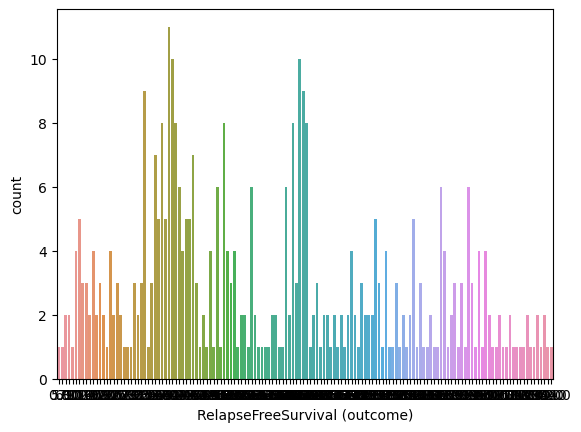

In [27]:
sns.countplot(x="RelapseFreeSurvival (outcome)", data=all_df)

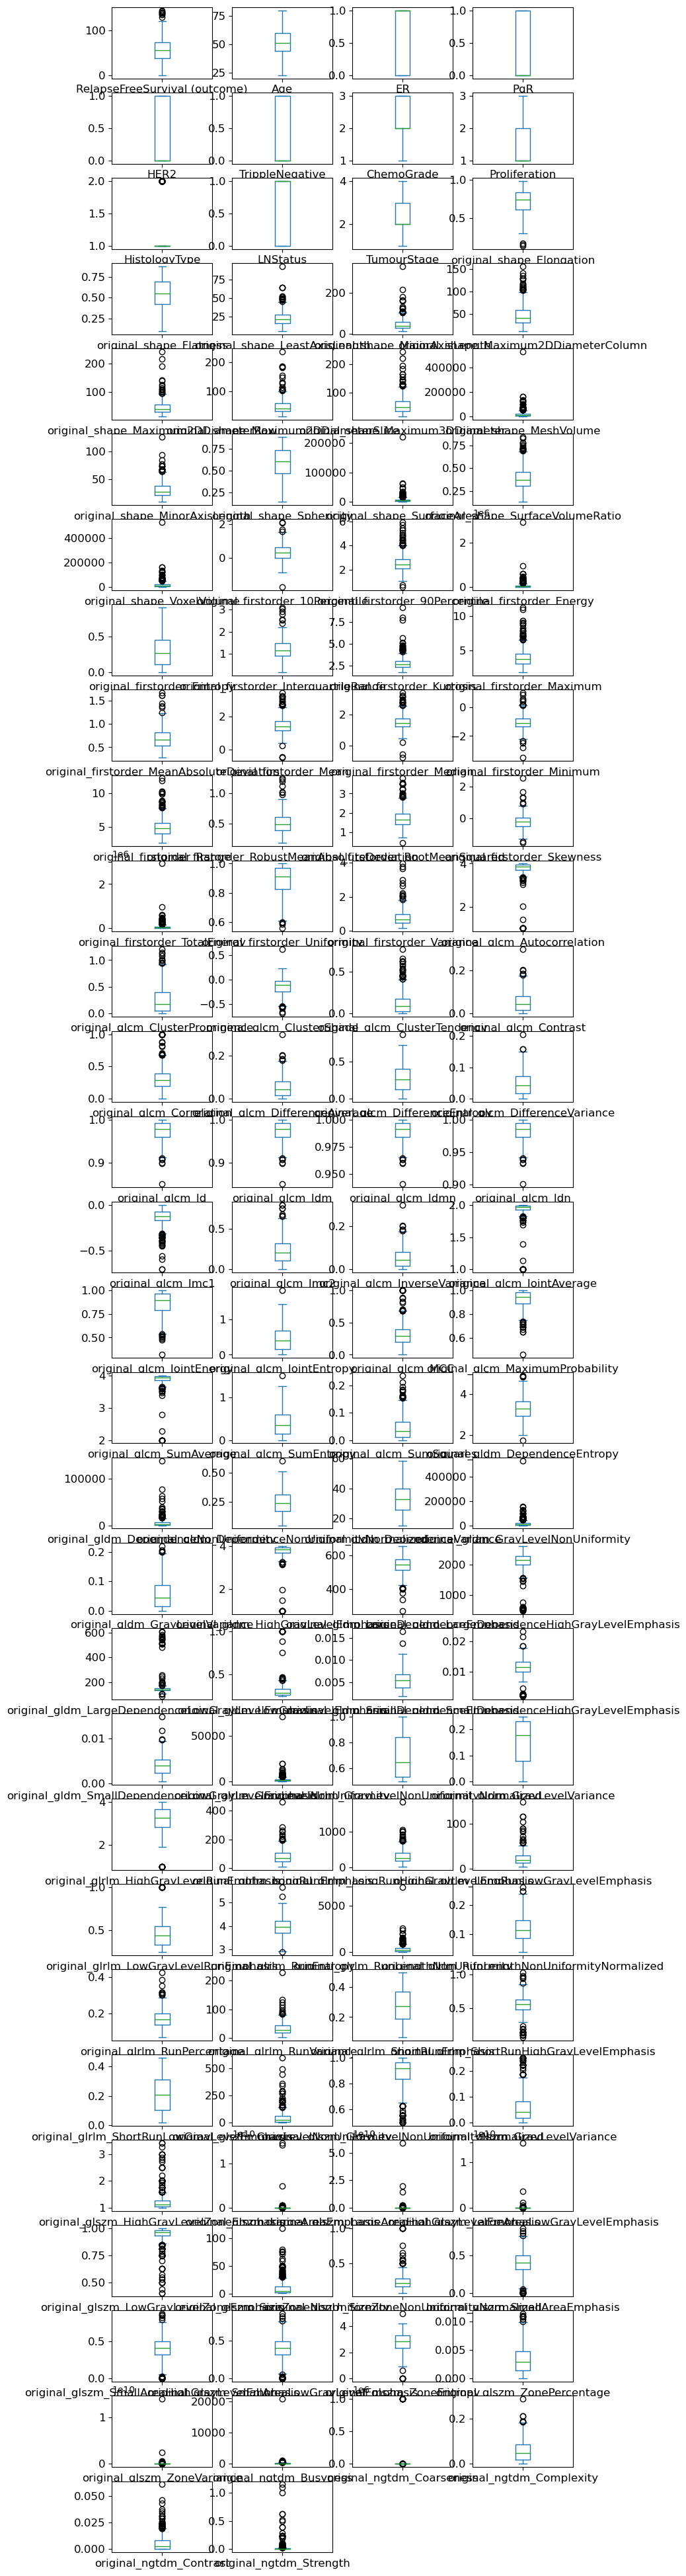

In [28]:
data_mean = all_df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(30,4), sharex=False, 
               sharey=False, fontsize=12, figsize=(9,50));

<Axes: >

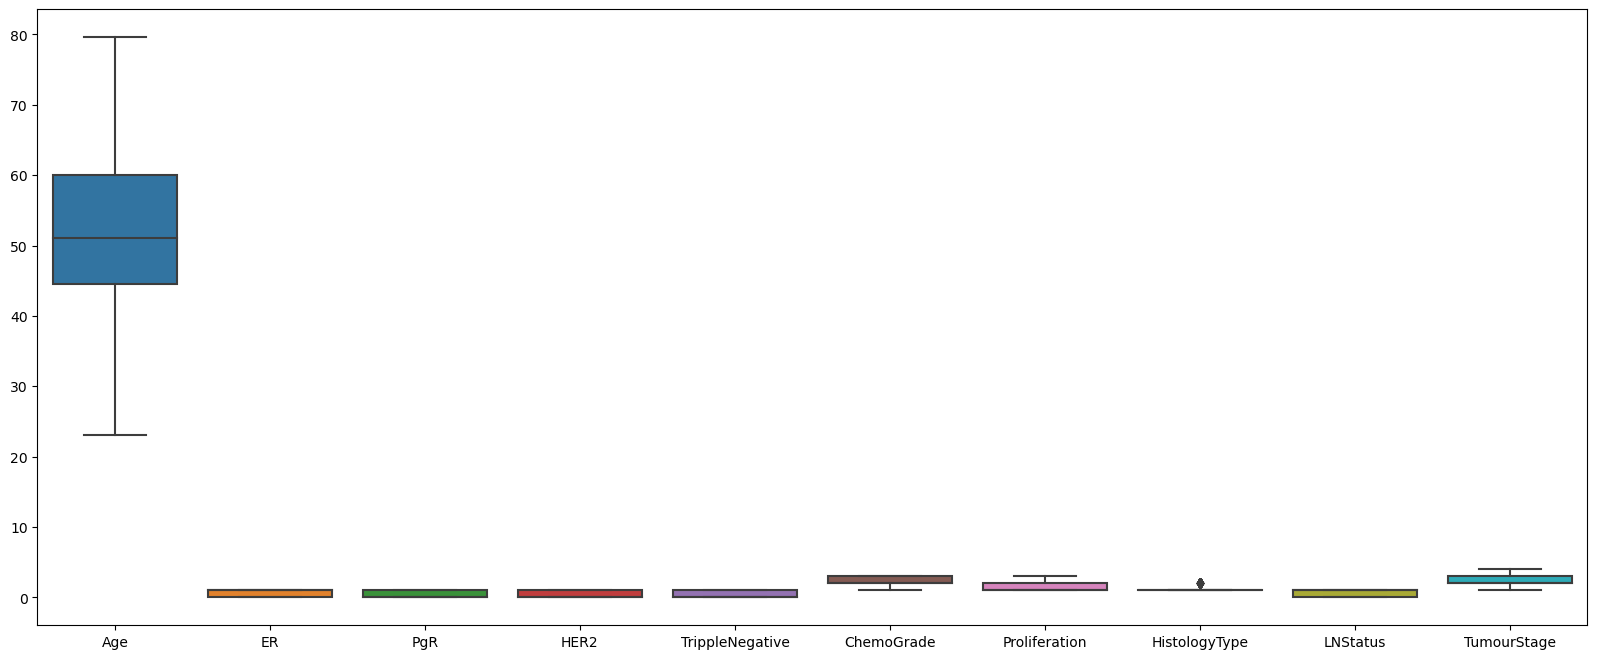

In [29]:
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=all_df.iloc[:, 1:11],ax=ax)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

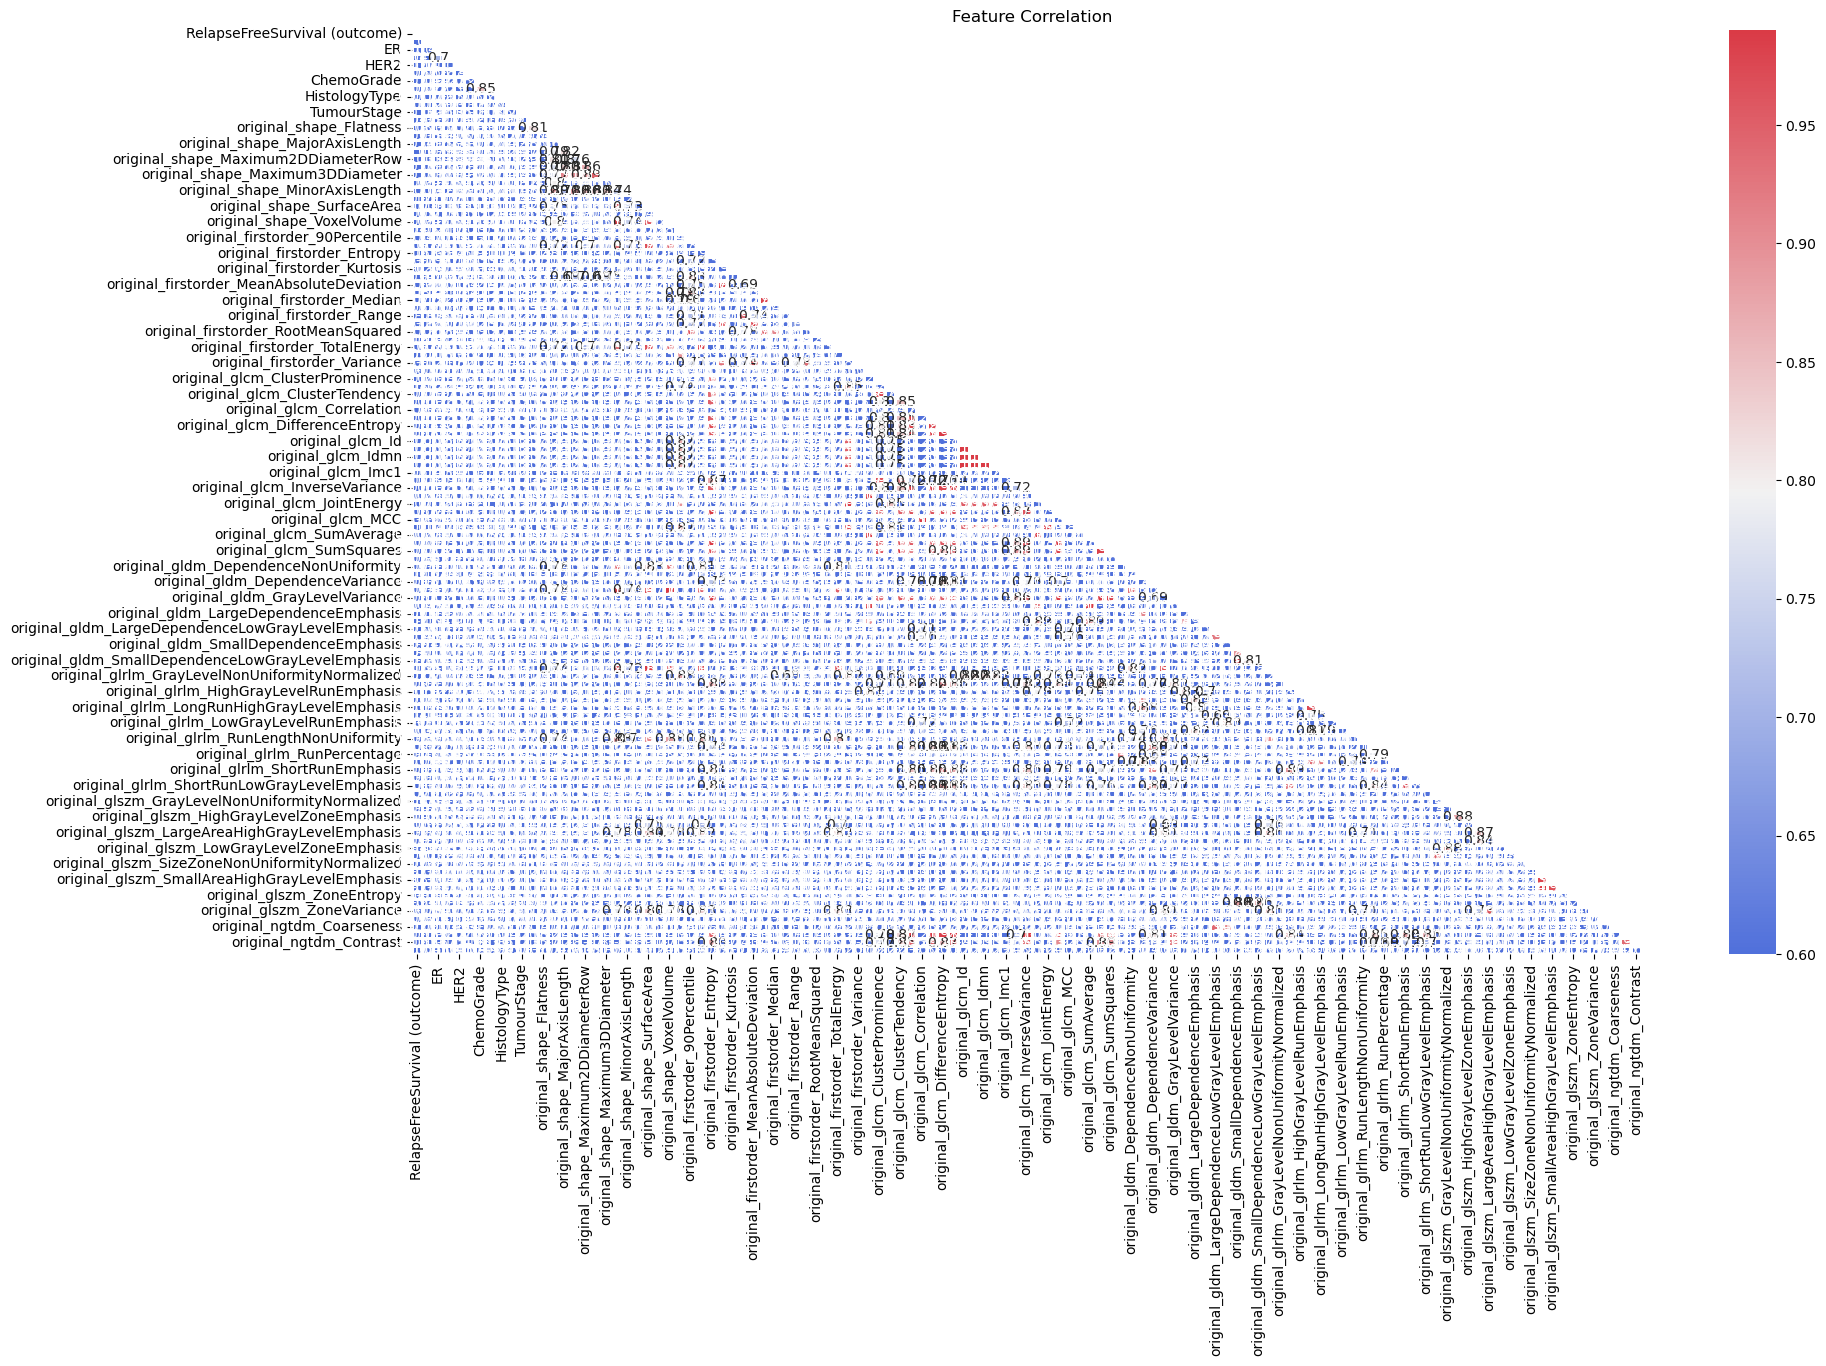

In [30]:
corrMatt = all_df.corr()
labels=all_df.columns
# Generate a mask for the upper triangle 
# mask is a matrix whose upper half is all 1 and the lower half is all 0
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# conditions for filtering 0.6<=r<=0.99
val_min = 0.6
val_max = 0.99
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Feature Correlation')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmin= val_min,vmax=val_max, square=False, cmap=cmap, mask=mask, 
ax=ax, annot=True, fmt='.2g', linewidths=1);
#delete columns where all elements don't fulfill the conditions
ind_x=np.where(np.all(np.logical_or(corrMatt<val_min,corrMatt>val_max),axis=0))
corrMatt = np.delete(corrMatt, ind_x,1)
#update x labels
map_labels_x=[item for i,item in enumerate(labels) if i not in ind_x]
#delete rows where all elements don'r fulfill the conditions
ind_y= np.where(np.all(np.logical_or(corrMatt<val_min,corr>val_max),axis=1))
corrMatt=np.delete(corrMatt,ind_y,0)
#update y labels
map_labels_y=[item for i, item in enumerate(labels)if i not in ind_y]
h2= sns.heatmap(corrMatt,xticklabels=map_labels_x,yticklabels=map_labels_y,
                vmin=val_min,vmax=val_max,cmap=cmap,ax=ax, annot=True, 
                fmt='.2g',linewidths=1.0)